In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv('Data/data_ready.csv')
df['const'] = 1
# df.head()
df.describe()

,Unnamed: 0,open,high,low,close,volume,days_post_ipo,first_day_open,first_day_high,first_day_low,...,^IXIC_close,^IXIC_adjclose,^IXIC_volume,^NYA_open,^NYA_high,^NYA_low,^NYA_close,^NYA_adjclose,^NYA_volume,const
count,534462.000000,5.344620e+05,5.344620e+05,5.344620e+05,5.344620e+05,5.344620e+05,534462.000000,5.344620e+05,5.344620e+05,5.344620e+05,...,534462.000000,534462.000000,5.344620e+05,534462.000000,534462.000000,534462.000000,534462.000000,534462.000000,5.344620e+05,534462.0
mean,268410.329565,5.593683e+04,6.210335e+04,5.104309e+04,5.593601e+04,7.357674e+05,138.284724,3.634570e+04,3.711582e+04,3.215713e+04,...,8005.397824,8005.397824,3.041616e+09,12041.102795,12102.316518,11974.726230,12042.058073,12042.058073,3.320589e+09,1.0
std,154552.299221,3.602113e+06,4.064362e+06,3.262801e+06,3.602113e+06,5.169728e+06,82.356382,1.851105e+06,1.890076e+06,1.636767e+06,...,5007.113348,5007.113348,1.633926e+09,3715.781805,3741.048002,3689.637169,3716.243872,3716.243872,1.418298e+09,0.0
min,0.000000,4.000000e-03,4.000000e-03,4.000000e-03,4.000000e-03,0.000000e+00,0.000000,1.142800e-02,1.142800e-02,1.142800e-02,...,1114.109985,1114.109985,1.494100e+08,4118.149902,4118.149902,4118.149902,4118.149902,4118.149902,0.000000e+00,1.0
25%,134766.250000,9.960000e+00,9.999923e+00,9.930000e+00,9.969000e+00,1.280000e+04,68.000000,1.005000e+01,1.017600e+01,1.000000e+01,...,2978.040039,2978.040039,1.820000e+09,9023.900391,9069.629883,8953.599609,9017.660156,9017.660156,2.835720e+09,1.0
50%,268606.500000,1.426000e+01,1.465000e+01,1.390000e+01,1.425000e+01,8.359750e+04,136.000000,1.512000e+01,1.635000e+01,1.425000e+01,...,7136.390137,7136.390137,2.245430e+09,12252.870117,12320.129883,12186.660156,12280.910156,12280.910156,3.428340e+09,1.0
75%,402221.750000,2.477000e+01,2.539000e+01,2.411000e+01,2.475000e+01,3.190000e+05,208.000000,2.320000e+01,2.526000e+01,2.200000e+01,...,13582.419922,13582.419922,4.377950e+09,16121.610352,16287.490234,15995.990234,16121.610352,16121.610352,4.012510e+09,1.0
max,535837.000000,6.500000e+08,8.500000e+08,4.812000e+08,6.500000e+08,7.084860e+08,369.000000,9.500000e+07,9.700000e+07,8.400000e+07,...,16057.440430,16057.440430,1.110216e+10,17353.759766,17442.539062,17285.550781,17353.759766,17353.759766,1.145623e+10,1.0


In [6]:
df = df[df.close < 100]
df.describe()

,Unnamed: 0,open,high,low,close,volume,days_post_ipo,first_day_open,first_day_high,first_day_low,...,^IXIC_close,^IXIC_adjclose,^IXIC_volume,^NYA_open,^NYA_high,^NYA_low,^NYA_close,^NYA_adjclose,^NYA_volume,const
count,513213.000000,513213.000000,513213.000000,513213.000000,513213.000000,5.132130e+05,513213.000000,513213.000000,513213.000000,513213.000000,...,513213.000000,513213.000000,5.132130e+05,513213.000000,513213.000000,513213.000000,513213.000000,513213.000000,5.132130e+05,513213.0
mean,273675.681600,18.531848,19.002408,18.033875,18.500220,7.458535e+05,138.204052,20.105395,21.761956,18.971353,...,8163.452842,8163.452842,3.084908e+09,12163.052820,12225.270237,12095.598175,12164.009421,12164.009421,3.349350e+09,1.0
std,153970.820674,15.282250,15.731185,14.788698,15.231054,5.234313e+06,82.143869,114.025721,114.436905,113.778686,...,5011.598447,5011.598447,1.641416e+09,3701.412181,3726.488586,3675.481846,3701.867721,3701.867721,1.398813e+09,0.0
min,0.000000,0.004000,0.004000,0.004000,0.004000,0.000000e+00,0.000000,0.011428,0.011428,0.011428,...,1114.109985,1114.109985,1.494100e+08,4118.149902,4118.149902,4118.149902,4118.149902,4118.149902,0.000000e+00,1.0
25%,141572.000000,9.940000,9.975000,9.900000,9.950000,1.540000e+04,68.000000,10.030000,10.130000,10.000000,...,3101.169922,3101.169922,1.834530e+09,9187.070312,9258.889648,9128.929688,9188.860352,9188.860352,2.858310e+09,1.0
50%,277223.000000,13.710000,14.030000,13.300000,13.680000,8.970000e+04,137.000000,14.750000,15.700000,13.780000,...,7356.990234,7356.990234,2.285050e+09,12409.040039,12476.129883,12341.820312,12400.280273,12400.280273,3.437900e+09,1.0
75%,406832.000000,23.080000,23.704000,22.500000,23.059999,3.312000e+05,207.000000,22.000000,23.889999,20.260000,...,13643.589844,13643.589844,4.409960e+09,16186.290039,16362.259766,16047.540039,16186.290039,16186.290039,4.015260e+09,1.0
max,535837.000000,172.199997,173.500000,99.949997,99.989998,7.084860e+08,369.000000,12581.000000,12581.000000,12581.000000,...,16057.440430,16057.440430,1.110216e+10,17353.759766,17442.539062,17285.550781,17353.759766,17353.759766,1.145623e+10,1.0


In [119]:
def offset_column(df, column, days):
    df.sort_values(by=['ticker', 'date'], inplace=True)
    mapping = {}
    for ticker in df.ticker.unique():
        try:
            value = df[(df.ticker == ticker) & (df.days_post_ipo >= days)].iloc[0][column]
        except IndexError:
            value =  pd.NA
        mapping[ticker] = value

    column_name = f'{column}_{days}_days_out'
    df[column_name] = df.apply(lambda row: mapping[row.ticker], axis=1)
    return df

df = offset_column(df, 'close', 5)
df.head()


,Unnamed: 0,date,open,high,low,close,volume,ticker,days_post_ipo,first_day_open,...,^NYA_open,^NYA_high,^NYA_low,^NYA_close,^NYA_adjclose,^NYA_volume,const,close_20_days_out,pred,close_5_days_out
29839,29972,1999-11-18,32.546494,35.765381,28.612303,31.473534,62546380.0,A,0,32.546494,...,6861.290039,6861.290039,6861.290039,6861.290039,6861.290039,0,1,32.32296,31.132990,28.612303
29840,29973,1999-11-19,30.713518,30.758226,28.478184,28.880545,15234146.0,A,1,32.546494,...,6831.899902,6831.899902,6831.899902,6831.899902,6831.899902,0,1,32.32296,28.618740,28.612303
29841,29974,1999-11-22,29.551144,31.473534,28.657009,31.473534,6577870.0,A,4,32.546494,...,6816.250000,6816.250000,6816.250000,6816.250000,6816.250000,0,1,32.32296,31.132990,28.612303
29842,29975,1999-11-23,30.400572,31.205294,28.612303,28.612303,5975611.0,A,5,32.546494,...,6736.950195,6736.950195,6736.950195,6736.950195,6736.950195,0,1,32.32296,28.358643,28.612303
29843,29976,1999-11-24,28.701717,29.998213,28.612303,29.372318,4843231.0,A,6,32.546494,...,6763.279785,6763.279785,6763.279785,6763.279785,6763.279785,0,1,32.32296,29.095580,28.612303


In [9]:
def offset_column(df, column, days):
    df.sort_values(by=['ticker', 'date'], inplace=True)
    list_shifted = []
    for ticker in df.ticker.unique():

        list_shifted.append( df[(df.ticker == ticker)][column].shift(-days))

    column_name = f'{column}_{days}_days_out'
    df[column_name] = pd.concat(list_shifted)
    return df

df = offset_column(df, 'close', 28)
df.head()

,Unnamed: 0,date,open,high,low,close,volume,ticker,days_post_ipo,first_day_open,...,^IXIC_adjclose,^IXIC_volume,^NYA_open,^NYA_high,^NYA_low,^NYA_close,^NYA_adjclose,^NYA_volume,const,close_28_days_out
29839,29972,1999-11-18,32.546494,35.765381,28.612303,31.473534,62546380.0,A,0,32.546494,...,3347.110107,1592920000,6861.290039,6861.290039,6861.290039,6861.290039,6861.290039,0,1,56.688126
29840,29973,1999-11-19,30.713518,30.758226,28.478184,28.880545,15234146.0,A,1,32.546494,...,3369.250000,1422350000,6831.899902,6831.899902,6831.899902,6831.899902,6831.899902,0,1,55.302216
29841,29974,1999-11-22,29.551144,31.473534,28.657009,31.473534,6577870.0,A,4,32.546494,...,3392.560059,1374760000,6816.250000,6816.250000,6816.250000,6816.250000,6816.250000,0,1,51.502148
29842,29975,1999-11-23,30.400572,31.205294,28.612303,28.612303,5975611.0,A,5,32.546494,...,3342.870117,1456310000,6736.950195,6736.950195,6736.950195,6736.950195,6736.950195,0,1,47.567955
29843,29976,1999-11-24,28.701717,29.998213,28.612303,29.372318,4843231.0,A,6,32.546494,...,3420.500000,1290550000,6763.279785,6763.279785,6763.279785,6763.279785,6763.279785,0,1,44.617310


In [101]:
df.columns[-30:]

Index(['^RUT_close', '^RUT_adjclose', '^RUT_volume', '^IXIC_open',
       '^IXIC_high', '^IXIC_low', '^IXIC_close', '^IXIC_adjclose',
       '^IXIC_volume', '^NYA_open', '^NYA_high', '^NYA_low', '^NYA_close',
       '^NYA_adjclose', '^NYA_volume', 'const', 'close_14_days_out', 'spread',
       '^DJI_spread', '^GSPC_spread', '^RUT_spread', '^IXIC_spread',
       '^NYA_spread', '^DJI_spread_day', '^GSPC_spread_day', '^RUT_spread_day',
       '^IXIC_spread_day', '^NYA_spread_day', 'emw_^NYA_volume', 'pred'],
      dtype='object')

In [19]:
columns = ['open', 'high', 'low', 'close', 'volume','^DJI_open', '^DJI_high', '^DJI_low',
       '^DJI_close', '^DJI_adjclose', '^DJI_volume', '^GSPC_open',
       '^GSPC_high', '^GSPC_low', '^GSPC_close', '^GSPC_adjclose',
       '^GSPC_volume', '^RUT_open', '^RUT_high', '^RUT_low', '^RUT_close',
       '^RUT_adjclose', '^RUT_volume', '^IXIC_open', '^IXIC_high', '^IXIC_low',
       '^IXIC_close', '^IXIC_adjclose', '^IXIC_volume', '^NYA_open',
       '^NYA_high', '^NYA_low', '^NYA_close', '^NYA_adjclose', '^NYA_volume']

def calculate_ewm(df, columns, span):
    df.sort_values(by=['ticker', 'date'], inplace=True)
    for col in columns:
        
        list_shifted = []
        for ticker in df.ticker.unique():
            list_shifted.append(df[(df.ticker == ticker)][col].ewm(span=span).mean())

    df[f'emw_{col}'] =  pd.concat(list_shifted)

    return df

df = calculate_ewm(df, columns=['close'], span=4)
df.head()

,Unnamed: 0,date,open,high,low,close,volume,ticker,days_post_ipo,first_day_open,...,^IXIC_volume,^NYA_open,^NYA_high,^NYA_low,^NYA_close,^NYA_adjclose,^NYA_volume,const,close_28_days_out,emw_close
29839,29972,1999-11-18,32.546494,35.765381,28.612303,31.473534,62546380.0,A,0,32.546494,...,1592920000,6861.290039,6861.290039,6861.290039,6861.290039,6861.290039,0,1,56.688126,31.473534
29840,29973,1999-11-19,30.713518,30.758226,28.478184,28.880545,15234146.0,A,1,32.546494,...,1422350000,6831.899902,6831.899902,6831.899902,6831.899902,6831.899902,0,1,55.302216,29.852916
29841,29974,1999-11-22,29.551144,31.473534,28.657009,31.473534,6577870.0,A,4,32.546494,...,1374760000,6816.250000,6816.250000,6816.250000,6816.250000,6816.250000,0,1,51.502148,30.679761
29842,29975,1999-11-23,30.400572,31.205294,28.612303,28.612303,5975611.0,A,5,32.546494,...,1456310000,6736.950195,6736.950195,6736.950195,6736.950195,6736.950195,0,1,47.567955,29.729643
29843,29976,1999-11-24,28.701717,29.998213,28.612303,29.372318,4843231.0,A,6,32.546494,...,1290550000,6763.279785,6763.279785,6763.279785,6763.279785,6763.279785,0,1,44.617310,29.574662


In [8]:
df.groupby('ticker').count().sort_values('close',ascending=False)


,Unnamed: 0,date,open,high,low,close,volume,days_post_ipo,first_day_open,first_day_high,...,^IXIC_close,^IXIC_adjclose,^IXIC_volume,^NYA_open,^NYA_high,^NYA_low,^NYA_close,^NYA_adjclose,^NYA_volume,const
ticker,,,,,,,,,,,,,,,,,,,,,
STRM,256,256,256,256,256,256,256,256,256,256,...,256,256,256,256,256,256,256,256,256,256
MTCH,256,256,256,256,256,256,256,256,256,256,...,256,256,256,256,256,256,256,256,256,256
PRMW,256,256,256,256,256,256,256,256,256,256,...,256,256,256,256,256,256,256,256,256,256
RAMP,256,256,256,256,256,256,256,256,256,256,...,256,256,256,256,256,256,256,256,256,256
CULL,256,256,256,256,256,256,256,256,256,256,...,256,256,256,256,256,256,256,256,256,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACOM,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
TRHC,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
VIVK,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [11]:
mask2 = (df.ticker == 'STRM') | (df.ticker == 'MTCH') |(df.ticker == 'PRMW')

/home/patrick/anaconda3/envs/regression/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='days_post_ipo', ylabel='close_28_days_out'>

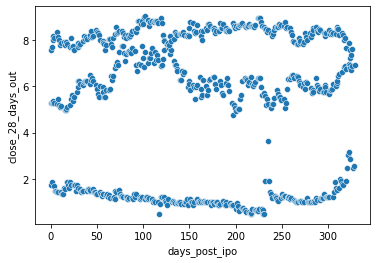

In [14]:
sns.scatterplot( df[mask]['days_post_ipo'], df[mask & mask2][y_col])

In [97]:
df[['open']].ewm(span=4).mean()

,open
29839,32.546494
29840,31.400884
29841,30.457139
29842,30.431143
29843,29.681045
...,...
222474,7.993640
222475,7.712184
222476,7.391310
222477,7.194786


In [41]:
df[['close','open']]

,close,open
29839,31.473534,32.546494
29840,28.880545,30.713518
29841,31.473534,29.551144
29842,28.612303,30.400572
29843,29.372318,28.701717
...,...,...
222474,7.190000,7.540000
222475,6.970000,7.290000
222476,6.900000,6.910000
222477,6.990000,6.900000


In [20]:
x_cols = ['const', 'emw_close']

y_col = 'close_28_days_out'

In [21]:
mask = (df.days_post_ipo >=0) & (~df[y_col].isna()) # Between 2 and 3 weeks after ipo
x = df[mask][x_cols]
# y = df[mask][y_col] / df[mask]['close']
y = df[mask][y_col].astype(float)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)

model = sm.OLS(y_train, X_train)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      close_28_days_out   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                 2.596e+06
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:50:38   Log-Likelihood:            -1.0674e+06
No. Observations:              348063   AIC:                         2.135e+06
Df Residuals:                  348061   BIC:                         2.135e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7830      0.014     55.769      0.000       0.755       0.811
emw_close      0.9485      0.001   1611.329      0.000       0.947       0.950
==============================================================================
Omnibus:                   140917.445   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8887859.579
Skew:                           1.130   Prob(JB):                         0.00
Kurtosis:                      27.652   Cond. No.                         38.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
r_squared_train = model.score(X_train, y_train)
r_squared_test = model.score(X_test, y_test)

print(f'Train R^2: {r_squared_train}\n Test R^2: {r_squared_test}')

Train R^2: 0.8826812671419564
 Test R^2: 0.884670885107501


### Here, it looks like predicting stock prices is easy.
- Let's take a closer look at our model inputs and results though...

#### What happens when we try to predict how much they change?

In [31]:
df['pred'] = model.predict(df[x_cols])
check = [x for x in x_cols] + [y_col, 'pred']
df[mask][check]

,const,days_post_ipo,open,high,low,close,volume,Employees,Offer amount,Shares Over Alloted,...,^IXIC_adjclose,^IXIC_volume,^NYA_open,^NYA_high,^NYA_low,^NYA_close,^NYA_adjclose,^NYA_volume,close_1_out,pred
29840,1,1,30.713518,30.758226,28.478184,28.880545,15234146.0,45800.0,2.160000e+09,0.0,...,3369.250000,1422350000,6831.899902,6831.899902,6831.899902,6831.899902,6831.899902,0,31.473534,30.411767
29841,1,4,29.551144,31.473534,28.657009,31.473534,6577870.0,45800.0,2.160000e+09,0.0,...,3392.560059,1374760000,6816.250000,6816.250000,6816.250000,6816.250000,6816.250000,0,28.880545,29.591984
29842,1,5,30.400572,31.205294,28.612303,28.612303,5975611.0,45800.0,2.160000e+09,0.0,...,3342.870117,1456310000,6736.950195,6736.950195,6736.950195,6736.950195,6736.950195,0,31.473534,30.165362
29843,1,6,28.701717,29.998213,28.612303,29.372318,4843231.0,45800.0,2.160000e+09,0.0,...,3420.500000,1290550000,6763.279785,6763.279785,6763.279785,6763.279785,6763.279785,0,28.612303,28.763251
29844,1,8,29.238197,29.685265,29.148785,29.461731,1729466.0,45800.0,2.160000e+09,0.0,...,3447.810059,730780000,6766.660156,6766.660156,6766.660156,6766.660156,6766.660156,0,29.372318,29.278293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222474,1,273,7.540000,7.540000,7.050000,7.190000,127200.0,7.0,4.200000e+07,0.0,...,4725.640137,1950800000,10302.679688,10337.209961,10257.750000,10286.240234,10286.240234,4058560000,7.620000,7.551572
222475,1,274,7.290000,7.290000,6.850000,6.970000,116300.0,7.0,4.200000e+07,0.0,...,4717.089844,1888350000,10303.040039,10340.459961,10254.719727,10281.320312,10281.320312,4008530000,7.190000,7.236366
222476,1,275,6.910000,7.185000,6.720000,6.900000,97100.0,7.0,4.200000e+07,0.0,...,4736.160156,1860800000,10280.990234,10315.919922,10230.500000,10308.830078,10308.830078,3796350000,6.970000,6.946983
222477,1,278,6.900000,7.120000,6.900000,6.990000,65800.0,7.0,4.200000e+07,0.0,...,4750.209961,1625100000,10300.660156,10325.049805,10261.120117,10291.589844,10291.589844,3788620000,6.900000,6.930861


In [100]:
df['pred'] = model.predict(df[x_cols])
check = [x for x in x_cols] + [y_col, 'pred']
mask1 =  ((df[y_col]) > 0)
mask2 = ((df[y_col] - df.close) < 0)
# mask3 = ((df.close_5_days_out/df.close) > 1)
# mask4 =  ((df.pred) <1.25)
print(f'False Positives:\t{len(df[(mask) & (mask1) & (mask2)])}/{len(df[(mask) & (mask1) ])}')
# (df[mask][y_col] - df[mask]['pred']).astype(float).describe()

mask1 =  ((df.pred- df.close) < 0)
mask2 = ((df[y_col]/df.close) > 0)
# mask3 = ((df.close_5_days_out/df.close) > 1)
# mask4 =  ((df.pred) <1.25)
print(f'Misses:\t{len(df[(mask) & (mask1) & (mask2)])}/{len(df[(mask) & (mask1) ])}')

(df[mask]['pred'] - df[mask][y_col]).astype(float).describe()

False Positives:	244318/474090
Misses:	471163/471163


count    474090.000000
mean        -18.520966
std          15.562966
min        -106.813610
25%         -23.255454
50%         -13.493808
75%          -9.761283
max           1.287560
dtype: float64

In [73]:
residuals = df[mask].pred - (df[mask][y_col])
residuals = residuals[(residuals < 2) & (residuals >-2)]
# residuals = residuals[residuals >-5]
sns.histplot(residuals)

AttributeError: 'DataFrame' object has no attribute 'pred'

##### These results actually seem less viable for us to use.

In [22]:

x = df[mask][x_cols]
y = df[mask][y_col].astype(float) - df[mask]['close'].astype(float) # The only thing we change between the models
# y = df[mask]['close']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)

model = sm.OLS(y_train, X_train)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     7985.
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:50:46   Log-Likelihood:            -1.0663e+06
No. Observations:              348063   AIC:                         2.133e+06
Df Residuals:                  348061   BIC:                         2.133e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8093      0.014     57.831      0.000       0.782       0.837
emw_close     -0.0524      0.001    -89.362      0.000      -0.054      -0.051
==============================================================================
Omnibus:                   136497.952   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9491223.208
Skew:                           1.041   Prob(JB):                         0.00
Kurtosis:                      28.497   Cond. No.                         38.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)
r_squared_train = model.score(X_train, y_train)
r_squared_test = model.score(X_test, y_test)

print(f'Train R^2: {r_squared_train}\n Test R^2: {r_squared_test}')

Train R^2: 0.02335845216986976
 Test R^2: 0.028117412739567693


### Why do we see such a difference?

- Is this because the scale?
- Predicting stock price mostly involves knowing how much the stock cost previously.
- Predicting how much it will change is more difficult.

#### Let's try this again with the rest of our features and see how it performs.

In [35]:
x_cols = [
    'const', 'days_post_ipo', 'open', 'high', 'low', 'close', 'volume', 'Employees',
       'Offer amount', 'Shares Over Alloted', 'Total Offering Expense',
       'Shareholder Shares Offered', 'Shares Outstanding', 'Revenue', 'Net Income', 'Total Assets',
       'Total Liabilities', "Stockholders' Equity", 'proposedSharePrice',
       'sharesOffered', 'dollarValueOfSharesOffered', 
       'Utilities',  'Technology', 'Services', 'Real Estate', 'Industrials', 'Healthcare',
       'Financial Services', 'Energy', 'Consumer Defensive',
       'Consumer Cyclical', 'Communication Services', 'Basic Materials',
       'Shell Companies', 'Biotechnology', 'Software—Application',
       'Banks—Regional', 'Software—Infrastructure', 'Medical Devices',
       'Drug Manufacturers—Specialty & Generic',
       'Internet Content & Information', 'Internet Retail',
       'Health Information Services', 'Diagnostics & Research',
       'Semiconductors', 'Education & Training Services', 'Asset Management',
       'Oil & Gas Midstream', 'Credit Services',
       'Medical Instruments & Supplies', 'Oil & Gas E&P',
       'Information Technology Services', 'Communication Equipment', 'Asia', 'North America', 'Europe', 'Africa',
       'South America', 'Oceania', '^DJI_open', '^DJI_high', '^DJI_low',
       '^DJI_close', '^DJI_adjclose', '^DJI_volume', '^GSPC_open',
       '^GSPC_high', '^GSPC_low', '^GSPC_close', '^GSPC_adjclose',
       '^GSPC_volume', '^RUT_open', '^RUT_high', '^RUT_low', '^RUT_close',
       '^RUT_adjclose', '^RUT_volume', '^IXIC_open', '^IXIC_high', '^IXIC_low',
       '^IXIC_close', '^IXIC_adjclose', '^IXIC_volume', '^NYA_open',
       '^NYA_high', '^NYA_low', '^NYA_close', '^NYA_adjclose', '^NYA_volume'
       ]

# y_col = 'close_5_days_out'

In [70]:
x_cols = ['const', 'days_post_ipo', 'open', 'high', 'volume', 'Employees',
       'Offer amount', 'Shares Over Alloted', 'Total Offering Expense',
       'Shareholder Shares Offered', 'Shares Outstanding', 'Revenue', 'Net Income', 'Total Assets',
       'Total Liabilities', "Stockholders' Equity", 'proposedSharePrice',
       'sharesOffered', 'dollarValueOfSharesOffered', 'Utilities',
    #    'Technology', 'Services', 'Real Estate', 'Industrials', 'Healthcare',
    #    'Financial Services', 'Energy', 'Consumer Defensive',
    #    'Consumer Cyclical', 'Communication Services', 'Basic Materials',
    #    'Shell Companies', 'Biotechnology', 'Software—Application',
    #    'Banks—Regional', 'Software—Infrastructure', 'Medical Devices',
    #    'Drug Manufacturers—Specialty & Generic',
    #    'Internet Content & Information', 'Internet Retail',
    #    'Health Information Services', 'Diagnostics & Research',
    #    'Semiconductors', 'Education & Training Services', 'Asset Management',
    #    'Oil & Gas Midstream', 'Credit Services',
    #    'Medical Instruments & Supplies', 'Oil & Gas E&P',
    #    'Information Technology Services', 'Communication Equipment', 'Asia', 'North America', 'Europe', 'Africa',
    #    'South America', 'Oceania','spread','^DJI_spread','^GSPC_spread','^RUT_spread','^IXIC_spread','^NYA_spread',
    #    '^DJI_spread_day','^GSPC_spread_day','^RUT_spread_day','^IXIC_spread_day','^NYA_spread_day'
    #    '^DJI_close','^GSPC_close','^RUT_close','^IXIC_close','^NYA_close'
       ]

# y_col = 'close_5_days_out'

In [9]:
df['spread'] = df.high - df.low
df['^DJI_spread']=df['^DJI_high'] -df['^DJI_low']
df['^GSPC_spread']=df['^GSPC_high']-df['^GSPC_low']
df['^RUT_spread']=df['^RUT_high']-df['^RUT_low']
df['^IXIC_spread']=df['^IXIC_high']-df['^IXIC_low']
df['^NYA_spread']= df['^NYA_high']- df['^NYA_low']


In [16]:
df['^DJI_spread_day']=df['^DJI_open'] -df['^DJI_close']
df['^GSPC_spread_day']=df['^GSPC_open']-df['^GSPC_close']
df['^RUT_spread_day']=df['^RUT_open']-df['^RUT_close']
df['^IXIC_spread_day']=df['^IXIC_open']-df['^IXIC_close']
df['^NYA_spread_day']= df['^NYA_open']- df['^NYA_close']

In [109]:
len(df)

513213

In [36]:

x = df[mask][x_cols]
y = df[mask][y_col].astype(float) - df[mask]['close'].astype(float) # The only thing we change between the models
# y = df[mask]['close']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)

model = sm.OLS(y_train, X_train)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     256.9
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:12:16   Log-Likelihood:            -1.0600e+06
No. Observations:              348063   AIC:                         2.120e+06
Df Residuals:                  347980   BIC:                         2.121e+06
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      1.3249      0.091     14.552      0.000       1.146       1.503
days_post_ipo                             -0.0021      0.000    -16.982      0.000      -0.002      -0.002
open                                      -0.0026      0.014     -0.181      0.856      -0.030       0.025
high                                      -0.2443      0.013    -18.134      0.000      -0.271      -0.218
low                                        0.4640      0.017     27.412      0.000       0.431       0.497
close                                     -0.2648      0.017    -15.568      0.000      -0.298      -0.232
volume                                  8.229e-10   1.87e-09      0.441      0.659   -2.83e-09    4.48e-09
Employees                               8.611e-06   8.87e-07      9.712      0.000    6.87e-06    1.03e-05
Offer amount                           -6.658e-07   6.75e-08     -9.861      0.000   -7.98e-07   -5.33e-07
Shares Over Alloted                       -0.8750      0.089     -9.800      0.000      -1.050      -0.700
Total Offering Expense                  2.624e-08   2.91e-09      9.020      0.000    2.05e-08    3.19e-08
Shareholder Shares Offered                 0.1684      0.024      6.943      0.000       0.121       0.216
Shares Outstanding                     -7.067e-12   2.57e-12     -2.755      0.006   -1.21e-11   -2.04e-12
Revenue                                -8.803e-12   5.72e-12     -1.538      0.124      -2e-11    2.41e-12
Net Income                             -6.459e-10   8.42e-11     -7.667      0.000   -8.11e-10   -4.81e-10
Total Assets                            1.711e-12   7.53e-12      0.227      0.820    -1.3e-11    1.65e-11
Total Liabilities                       7.058e-12   7.78e-12      0.907      0.365    -8.2e-12    2.23e-11
Stockholders' Equity                   -7.048e-11   1.17e-11     -6.006      0.000   -9.35e-11   -4.75e-11
proposedSharePrice                         0.0347      0.001     28.070      0.000       0.032       0.037
sharesOffered                           2.938e-09   7.35e-10      3.999      0.000     1.5e-09    4.38e-09
dollarValueOfSharesOffered              6.657e-07   6.75e-08      9.859      0.000    5.33e-07    7.98e-07
Utilities                                 -0.5533      0.124     -4.474      0.000      -0.796      -0.311
Technology                                -0.0631      0.075     -0.847      0.397      -0.209       0.083
Services                                  -0.7055      0.442     -1.597      0.110      -1.571       0.160
Real Estate                               -0.6447      0.064    -10.041      0.000      -0.771      -0.519
Industrials                               -0.2815      0.057     -4.925      0.000     

In [32]:

x = df[mask][x_cols]
y = df[mask][y_col].astype(float) #- df[mask]['close'].astype(float) # The only thing we change between the models
# y = df[mask]['close']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)

model = sm.OLS(y_train, X_train)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      close_28_days_out   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                 3.322e+04
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:59:34   Log-Likelihood:            -1.0600e+06
No. Observations:              348063   AIC:                         2.120e+06
Df Residuals:                  347980   BIC:                         2.121e+06
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      1.3249      0.091     14.552      0.000       1.146       1.503
days_post_ipo                             -0.0021      0.000    -16.982      0.000      -0.002      -0.002
open                                      -0.0026      0.014     -0.181      0.856      -0.030       0.025
high                                      -0.2443      0.013    -18.134      0.000      -0.271      -0.218
low                                        0.4640      0.017     27.412      0.000       0.431       0.497
close                                      0.7352      0.017     43.213      0.000       0.702       0.768
volume                                  8.229e-10   1.87e-09      0.441      0.659   -2.83e-09    4.48e-09
Employees                               8.611e-06   8.87e-07      9.712      0.000    6.87e-06    1.03e-05
Offer amount                           -7.017e-07   6.75e-08    -10.393      0.000   -8.34e-07   -5.69e-07
Shares Over Alloted                       -0.8750      0.089     -9.800      0.000      -1.050      -0.700
Total Offering Expense                  2.624e-08   2.91e-09      9.020      0.000    2.05e-08    3.19e-08
Shareholder Shares Offered                 0.1684      0.024      6.943      0.000       0.121       0.216
Shares Outstanding                     -7.067e-12   2.57e-12     -2.755      0.006   -1.21e-11   -2.04e-12
Revenue                                -8.803e-12   5.72e-12     -1.538      0.124      -2e-11    2.41e-12
Net Income                             -6.459e-10   8.42e-11     -7.667      0.000   -8.11e-10   -4.81e-10
Total Assets                            1.711e-12   7.53e-12      0.227      0.820    -1.3e-11    1.65e-11
Total Liabilities                       7.058e-12   7.78e-12      0.907      0.365    -8.2e-12    2.23e-11
Stockholders' Equity                   -7.048e-11   1.17e-11     -6.006      0.000   -9.35e-11   -4.75e-11
proposedSharePrice                         0.0347      0.001     28.070      0.000       0.032       0.037
sharesOffered                           2.938e-09   7.35e-10      3.999      0.000     1.5e-09    4.38e-09
dollarValueOfSharesOffered              7.016e-07   6.75e-08     10.391      0.000    5.69e-07    8.34e-07
Utilities                                 -0.5533      0.124     -4.474      0.000      -0.796      -0.311
Technology                                -0.0631      0.075     -0.847      0.397      -0.209       0.083
Services                                  -0.7055      0.442     -1.597      0.110      -1.571       0.160
Real Estate                               -0.6447      0.064    -10.041      0.000      -0.771      -0.519
Industrials                               -0.2815      0.057     -4.925      0.000     

In [88]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print()
print(mean_absolute_error(y_test, model.predict(X_test)))
mean_squared_error(y_test, model.predict(X_test))


1.92830434956598


14.19574784369797

In [89]:
mean_squared_error(y_test, X_test['close'].astype(float))

598.6481019597961

In [99]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, model.predict(X_test)))
mean_squared_error(y_test, model.predict(X_test))

1.92830434956598


14.19574784369797

In [98]:
model = LinearRegression()
model.fit(X_train, y_train)
r_squared_train = model.score(X_train, y_train)
r_squared_test = model.score(X_test, y_test)

print(f'Train R^2: {r_squared_train}\n Test R^2: {r_squared_test}')
# mean_squared_error(y_test, model.predict(X_test))

Train R^2: 0.03293428798550169
 Test R^2: 0.033026663174647086


/home/patrick/anaconda3/envs/regression/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='close_14_days_out'>

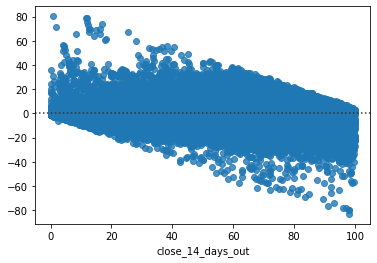

In [93]:
sns.residplot(y, model.predict(x))

<AxesSubplot:ylabel='Count'>

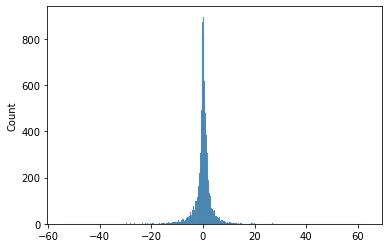

In [79]:
sns.histplot(model.predict(x)-y)

In [80]:
pd.DataFrame(model.predict(x)-y).describe()

,0
count,16003.000000
mean,-0.004684
std,3.821260
min,-54.404480
25%,-0.787959
50%,0.147957
75%,1.191731
max,63.512399


In [30]:
df['pred'] = model.predict(df[x_cols])
check = [x for x in x_cols] + [y_col, 'pred']
mask1 =  ((df.pred) > 1)
mask2 = ((df[y_col]/df.close) < 1)
# mask3 = ((df.close_5_days_out/df.close) > 1)
# mask4 =  ((df.pred) <1.25)
print(f'False Positives:\t{len(df[(mask) & (mask1) & (mask2)])}/{len(df[(mask) & (mask1) ])}')
(df[mask][y_col] - df[mask]['pred']).astype(float).describe()

False Positives:	219343/505662


count    510414.000000
mean         -0.000045
std           0.750742
min         -85.282439
25%          -0.105773
50%          -0.006382
75%           0.091518
max          78.833838
dtype: float64

In [25]:
mask1 =  ((df.pred) < 1)
mask2 = ((df[y_col]/df.close) > 1)
# mask3 = ((df.close_5_days_out/df.close) > 1)
# mask4 =  ((df.pred) <1.25)
print(f'Misses:\t{len(df[(mask) & (mask1) & (mask2)])}/{len(df[(mask) & (mask1) ])}')
(df[mask][y_col] - df[mask]['pred']).astype(float).describe()

Misses:	209391/485234


count    510414.000000
mean         18.495535
std          15.240971
min          -3.633987
25%           9.913526
50%          13.663227
75%          23.090674
max         104.437040
dtype: float64

<AxesSubplot:ylabel='Count'>

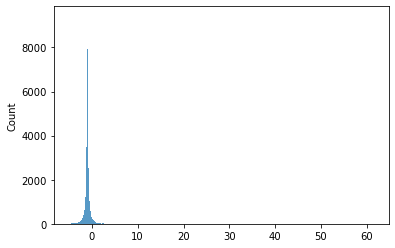

In [26]:
residuals = df[mask].pred - (df[mask][y_col]/df[mask].close)
residuals = residuals[residuals >-5]
sns.histplot(residuals)
# residuals

In [27]:
df.skew(skipna=True).sort_values(ascending=False)[:50]

/tmp/ipykernel_5027/2956578496.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(skipna=True).sort_values(ascending=False)[:50]


first_day_low                             107.562832
first_day_open                            106.845760
first_day_close                           106.691516
first_day_high                            105.668507
Services                                   51.672046
Shares Outstanding                         50.771267
Africa                                     44.828699
volume                                     38.068520
Revenue                                    23.841078
Oceania                                    20.019780
Total Liabilities                          16.142181
Net Income                                 16.108803
Total Assets                               15.547587
Employees                                  15.155764
dollarValueOfSharesOffered                 15.076834
Offer amount                               15.076834
first_day_volume                           13.805962
Utilities                                  13.164649
Communication Equipment                    11.

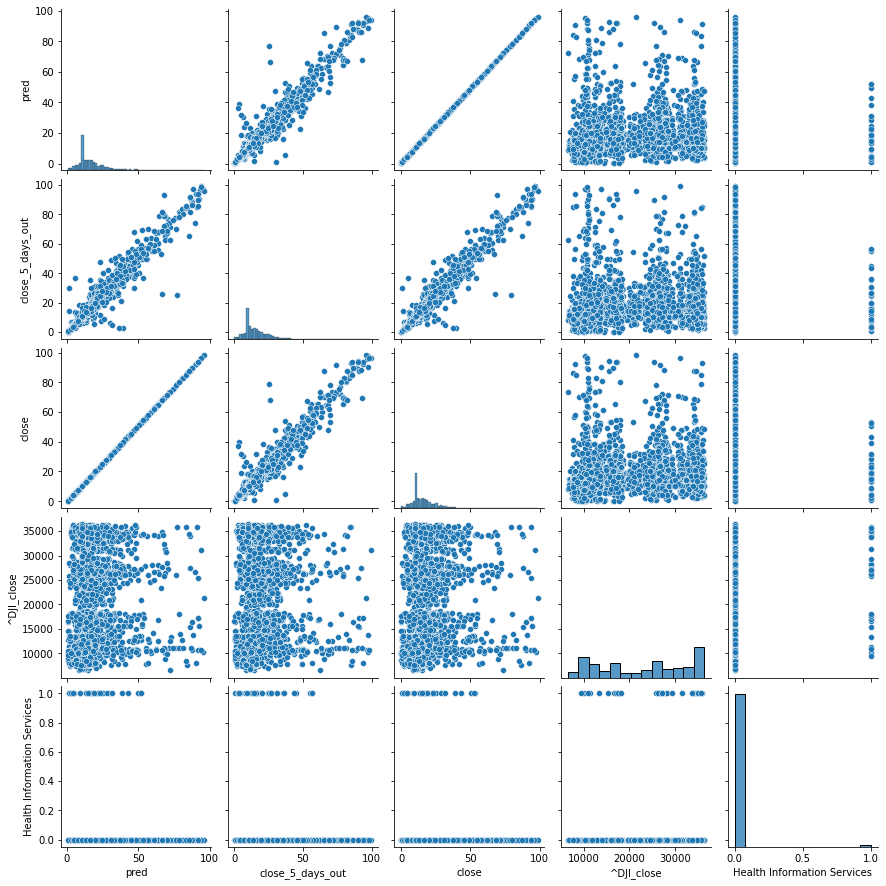

In [196]:
sns.pairplot(df[mask][['pred','close_5_days_out','close','^DJI_close','Health Information Services' ]])
